## AB Tests

### 1. Оценка результатов AB теста

В данном задании вам требуется оценить результаты AB теста. Даны результаты на контрольной и тестовой группе после проведения AB теста.
Помимо показателей целевой переменной, вам даны также несколько фичей, которые являются характеристиками объектов. Даны целевые показатели (y) и принадлежность к целевой группе (W).

</u>Задача:</u>
1. Проверьте подходящую для данных гипотезу о равенстве средних в выборках
2. Каков treatment effect нашего воздействия? (ATE) 
3. Примените известные вам методы оценки ATE с учетом особенностей данных.
4. Проанализируйте, сравните результаты применения различных методов.
5. В явном виде выпишите выводы.

</i>Примечание: предположения о рандомизированном эксперименте нуждаются в проверке - независимость treatment от объектов не гарантирована. Все предположения выписывайте явно.</i> 

Для данной задачи используется dataset:  dataset_part1_students.csv

In [ ]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_csv('./data/dataset_part1_students.csv', sep='\t')

In [ ]:
x = np.arange(-10, 15, .1)
sps.norm.cdf(x)

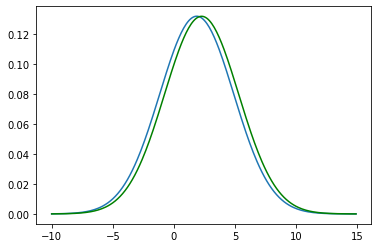

In [ ]:
plt.plot(x, sps.norm(loc=1.866, scale=3.028).pdf(x))
plt.plot(x, sps.norm(loc=2.266, scale=3.029).pdf(x), 'g')

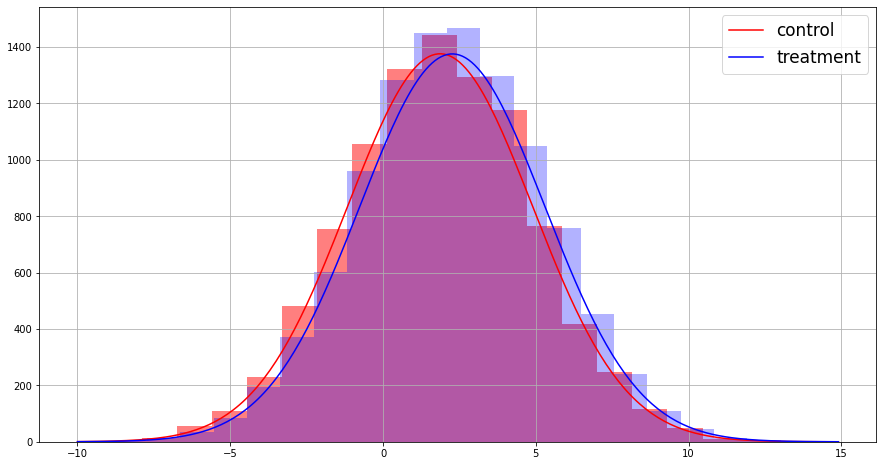

In [ ]:
fig = plt.figure(figsize=(15,8))
df.y[df.W == 0].hist(bins=20, color='red', alpha=.5)
plt.plot(x, len(df.y[df.W == 1]) * sps.norm(loc=1.866, scale=3.028).pdf(x), 'r', label='control')

df.y[df.W == 1].hist(bins=20, color='b', alpha=.3)
plt.plot(x, len(df.y[df.W == 1]) * sps.norm(loc=2.266, scale=3.029).pdf(x), 'b', label='treatment')

plt.legend(fontsize=17)

In [ ]:
def is_normal(data):
  mu, sigma = sps.norm.fit(data)

  bounds = [sps.norm.ppf(i, loc=mu, scale=sigma) for i in np.arange(0, 1.1, .1)]
  freq = [data.map(lambda x: bounds[i] < x < bounds[i+1]).sum() for i in range(len(bounds) - 1)]

  print('p-value =', sps.chisquare(freq, ddof=2)[1].round(4))

In [ ]:
is_normal(df.y[df.W == 1])

p-value = 0.9257


In [ ]:
is_normal(df.y[df.W == 0])

p-value = 0.552


In [ ]:
'p-value = {:.2e}'.format(sps.ttest_ind(df.y[df.W == 1],
                                        df.y[df.W == 0],
                                        equal_var=False)[1])

'p-value = 1.14e-20'

In [ ]:
round(df.y[df.W == 1].mean() - df.y[df.W == 0].mean(), 4)

0.4001

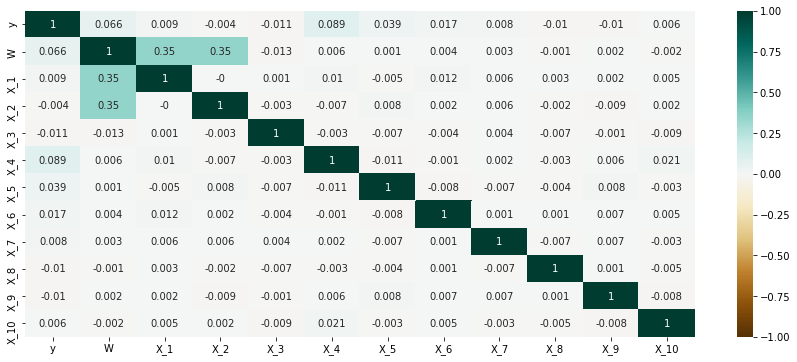

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(df.corr().round(3), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
df['ones'] = np.ones(df.shape[0])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df.iloc[:, 1:], df.iloc[:, 0])
model.coef_[0].round(4)

0.5134

### 2. Оценка результатов AB теста с показателями до начала эксперимента

Необходимо как и ранее оценить результаты AB теста, а именно ATE. Вы располагаете результатами до и после проведения теста (y_0 и y_1), а также вам дан treatment assignment (W). 

Необходимо: 
1. Проверить все требуемые гипотезы
2. Оценить ATE подходящим для этого случая методом (примените несколько методов)
3. Сравнить и проанализировать результаты оценок
4. Явно выписать выводы.

Как и прежде, все предположения должны быть указаны. Визуализация результатов приветствуется.

dataset_part2_students.csv

### 3. Построение uplift модели по результатам AB теста.

Вам даны результаты AB теста для модели конверсии клиента в продукте (conversion). Конверсия может принимать значения 1 или 0, что значит - клиент подключил услугу, либо не подключил соответственно.

Задача:
1. Оцените ATE по данным.
2. Оцените CATE для каждого наблюдения.
3. Проставьте рекомендации к воздействию на каждый объект.
4. Какая ожидаемая конверсия при оптимальном воздействии?
5. Все выводы, предпосылки и методы представляйте в явном виде в ноутбуке.

Визуализация результатов также будет приветствоваться.

dataset_part3_students.csv